**INTRODUCTION**


Nowadays, high volume data takes up more space than expected on both hard disk drives and clouds. Especially high-resolution images cause difficulties in transferring and storing between drives. Therefore, image compression is of great importance. The compression process, which reduces image quality to an acceptable level, requires great care.

Singular value decomposition is a linear algebra method that allows us to take the inverses of non-square matrices of a data and divide the matrix into pieces. In this way, the matrices of images requiring high storage space are divided into three parts and represented at a lower-rank by the Eckart-Young-Mirsky theorem, and by using appropriate variables, the distortion of the image is brought to the most acceptable level and allows less storage space to be used.

In this project, a low-rank approximation will be used by applying SVD on several images. The results obtained will be examined considering the performance of the image compression process, image quality and compression ratios. The results obtained will prove that SVD is an effective method for image compression.


**METHODOLOGY**

Python:

 Python was used as the programming language in this project. "numpy" library was used for matrix operations, "PIL" library was used to open and process image files, and "matplotlib" library was used for visualization.

Eckart–Young–Mirsky Method:

  This theorem allows us to find the best low-rank approximation of a matrix. The crux of this theorem is SVD. Ak, the approximate matrix of matrix A, is obtained by trimming the largest singular value in matrix A and the first k columns and first k rows. That is, the largest k singular values ​​in the singular value decomposition of matrix A and the corresponding singular vectors are used.


SVD:

Imagine that we have a matrix with A=mxn size. The decomposition matrix is represented as A= UΣVT. In order to decompose the values, the following steps should be applied (Matrix U and V must be orthonormal):

1. 	Transpose matrix A and multiply by itself. (AAT)
2. 	Then find the eigenvalues and eigenvectors of AAT matrix.
3.  	After finding the eigenvalues, find the singular values (σ). (Square the eigenvalues)
4. 	Place the singular values σ ​​on the diagonals and find the Σ matrix.
5. 	To find the eigenvectors (V), subtract every singular values σ from the AAT matrix and multiply by xn set equal to zero.
6. 	After finding the eigenvectors, divide each value by its length, and fill the matrix by columns you found and obtain matrix V.
7. 	Take the transpose of matrix V (VT).
8. 	Last, to find each column of the U matrix in turn, first multiply the A matrix with the first column of the V matrix and divide by the first singular value. This process is done for each singular value in the matrix Σ starting from the beginning.

After performing the singular value decomposition of matrix A, we express the best low-rank approximation matrix as Ak.
Uk: first k columns of matrix U
Σk: Diagonal matrix containing the first k unique values
Vk: First k columns of matrix V

According to the Eckart-Young-Mirsky theorem, it has the smallest Frobenius normed error. It is expressed as ||A-Ak||F.


Numpy SVD:

In this project, Singular Value Decomposition (SVD) application to image matrices was done using the built-in "numpy.linalg.svd" function of the numpy library. The first parameter is to specify the desired image to compress. The second parameter used when calling the function is "full_matrices=False"and it prevents the full calculation of U and Vt matrices, allowing smaller and more computationally efficient matrices to be created.




**MAIN FINDINGS**

In this study, the pictures below have been used.



<img src="images/arda.jpg" alt="Image" width="300" height="200">





<img src="images/fenerbahce.png" alt="Image" width="300" height="200">


<img src="images/istanbul.jpg" alt="Image" width="300" height="200">


<img src="images/kizkule.jpg" alt="Image" width="300" height="200">


**Code:**

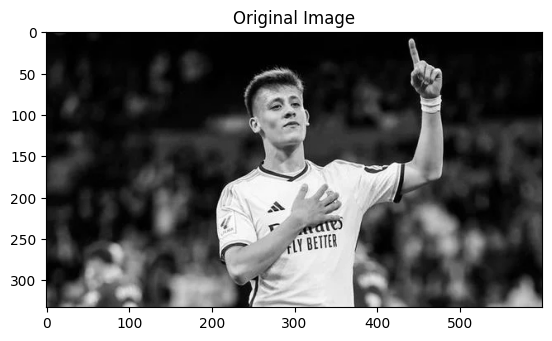

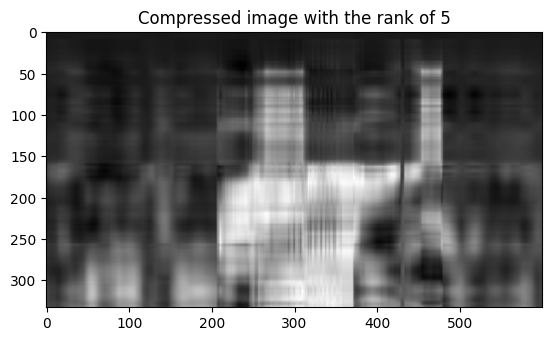

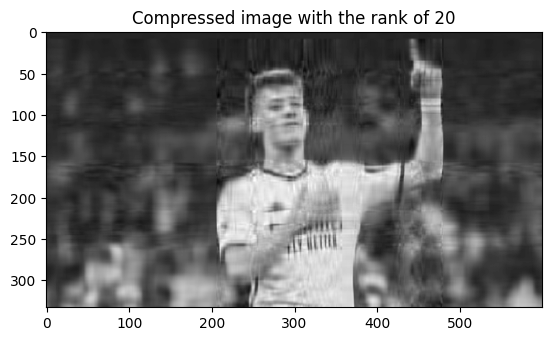

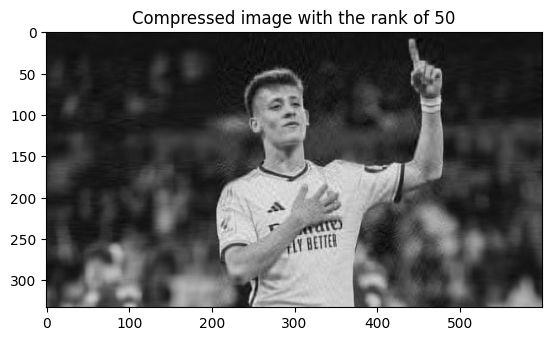

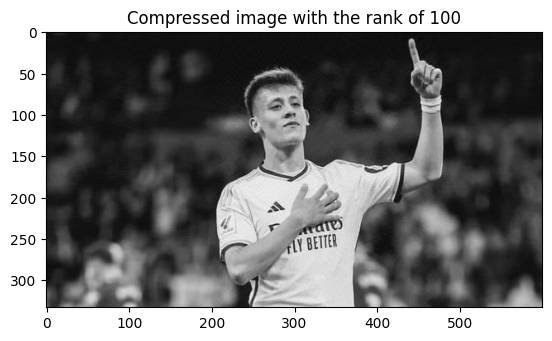

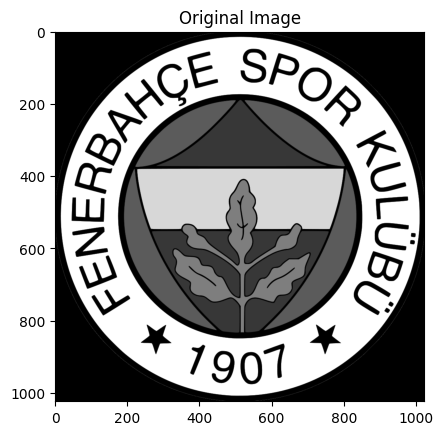

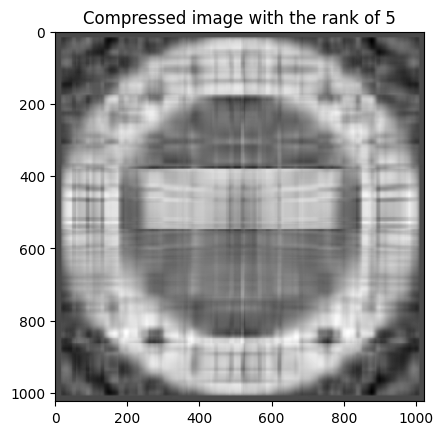

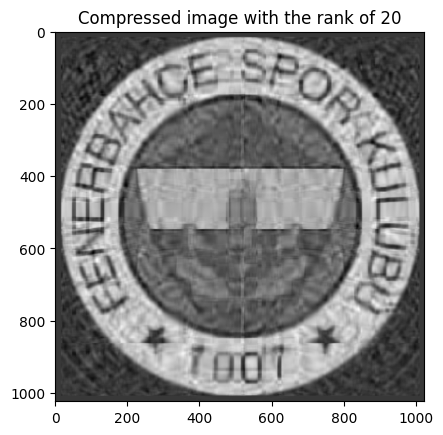

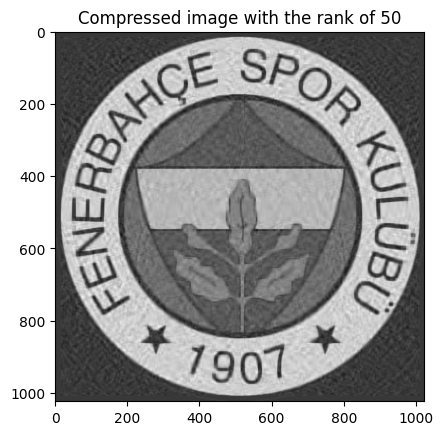

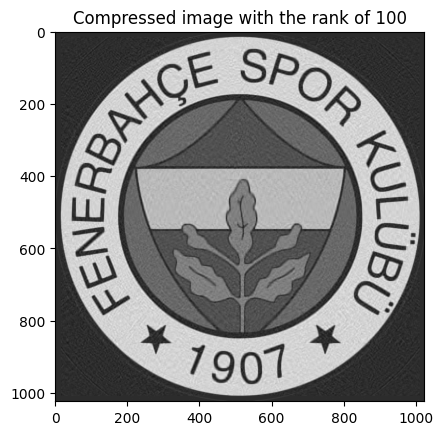

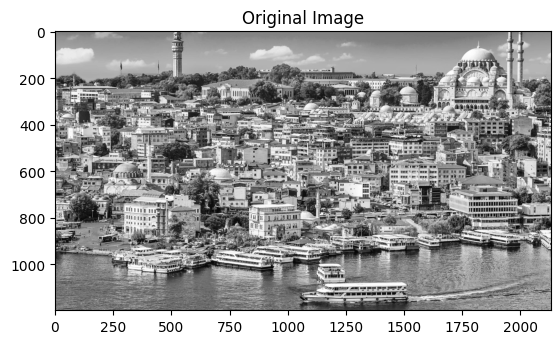

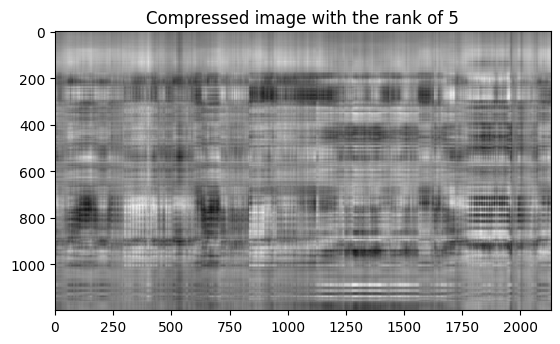

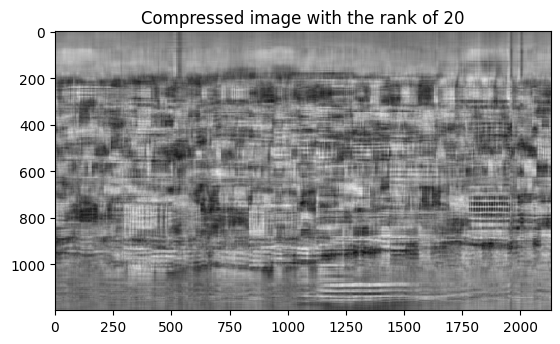

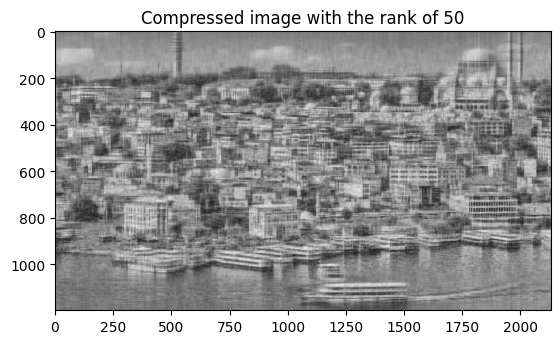

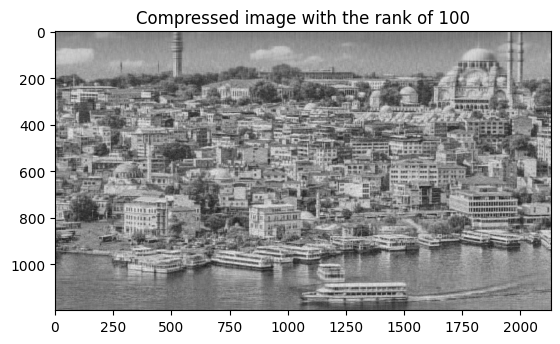

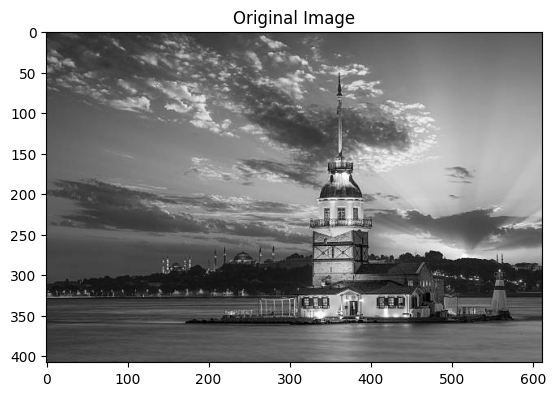

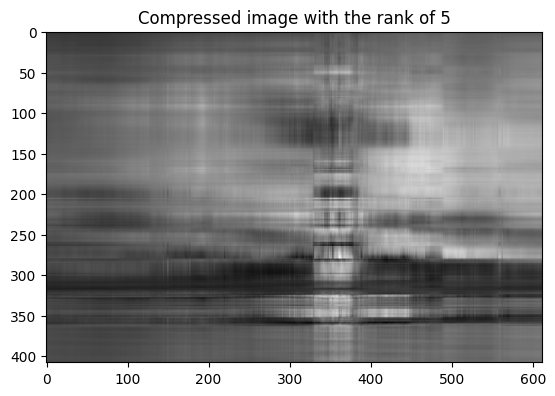

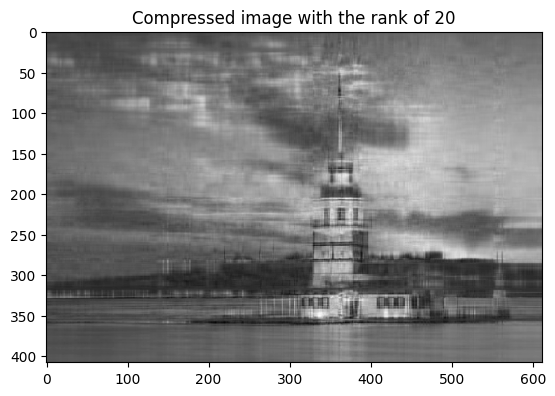

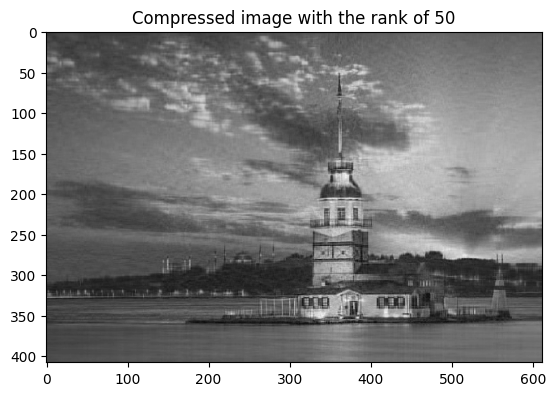

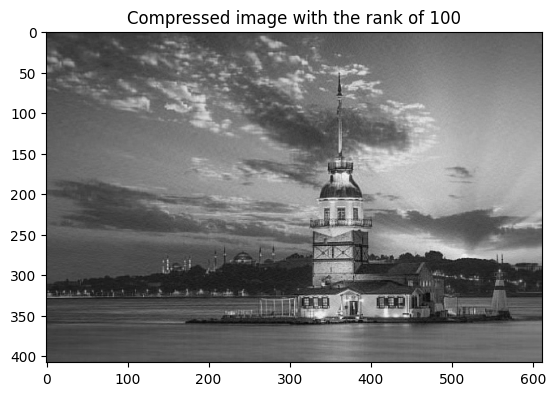

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# paths of used images
image_paths = [
    'images/arda.jpg',
    'images/fenerbahce.png',
    'images/istanbul.jpg',
    'images/kizkule.jpg'
]

# function for loading the image and converting it to a grayscale numpy array
def load_image(image_path):
    image = Image.open(image_path) # open image
    image = image.convert('L')     # convert the image to grayscale ('L' mode)
    image_array = np.array(image)  # convert the image to a numpy array
    return image_array  # return the numpy array



# Compress Function
def compress_image(image_matrix, k): # compress image by passing the desired k value parameter
    U, S, Vt = np.linalg.svd(image_matrix, full_matrices=False)  # performing numpy svd function
    S_k = np.diag(S[:k]) # creating a diagonal matrix from the first k singular values
    U_k = U[:, :k] # take the first k columns of U
    Vt_k = Vt[:k, :] # take the first k rows of Vt
    compressed_image = np.dot(U_k, np.dot(S_k, Vt_k)) # reconstruct the image using the reduced matrices
    return compressed_image

# function for saving images
def save_image(image_matrix, output_path):
    image = Image.fromarray(np.uint8(image_matrix))  # Convert the numpy array to an image
    image.save(output_path)  # Save the image to the specified path


k_values = [5, 20, 50, 100] # k values that tested

count = 0 # to save compressed images in order

for image_path in image_paths: # for all images
    image_matrix = load_image(image_path)  # using load_image function to open and convert images to grayscale


    plt.imshow(image_matrix, cmap='gray')
    plt.title('Original Image')
    plt.show() # display the original image before compression

    for k in k_values: #for each k value, images are compressed
        compressed_image_matrix = compress_image(image_matrix, k)  # calling compress function
        output_path = f'compressed_image_{count}.jpg'  # defining the output path for compressed version of image
        save_image(compressed_image_matrix, output_path)  # saving the new image
        plt.imshow(compressed_image_matrix, cmap='gray')  # displaying the new image
        plt.title(f'Compressed image with the rank of {k}')  # setting the title of plot to understand which k value have used
        plt.show()  # showing the plot
        count += 1


**CONCLUSION**


In this study, a low-rank approach is implemented using Singular Value Decomposition to apply compression on high-resolution images. SVD has been an effective method of image compression by splitting matrices into smaller and more computationally efficient components. Within the scope of the project, compression was performed on 4 different images using 4 different k values.

In conclusion, this project provides a simple example of how image compression using SVD can be applied in practice and what results can be obtained. In the future, the performance of SVD in different scenarios can be examined in more detail by conducting more comprehensive studies on different image types and compression levels.



**REFERENCES**

1.   Fitzpatrick, B. (2021, April 14). Singular Value Decomposition. YouTube. https://www.youtube.com/watch?v=OdpAtjvEw4c 

2. Steven L. Brunton & J. Nathan Kutz: Data Driven Science and Engineering, Cambridge
University Press, 2019. Chapter 1: Singular value decomposition.
http://databookuw.com/page-2/page-4/

3. Brunton, Steven & Kutz, J.. (2019). Singular Value Decomposition (SVD). 10.1017/9781108380690.002. 

4. Wilkinson, Prof. R. (n.d.). Multivariate statistics. 3.5 Low-rank approximation. https://rich-d-wilkinson.github.io/MATH3030/3.5-lowrank.html

5. Vincent, R. J. (2021, July 29). Singular Value Decomposition (SVD)  - Working Example. Medium. https://medium.com/intuition/singular-value-decomposition-svd-working-example-c2b6135673b5